In [ ]:
# Check free memory available
%system free -m

In [ ]:
#! pip install pandas_gbq

#! pip install import-ipynb #to import from other notebook files

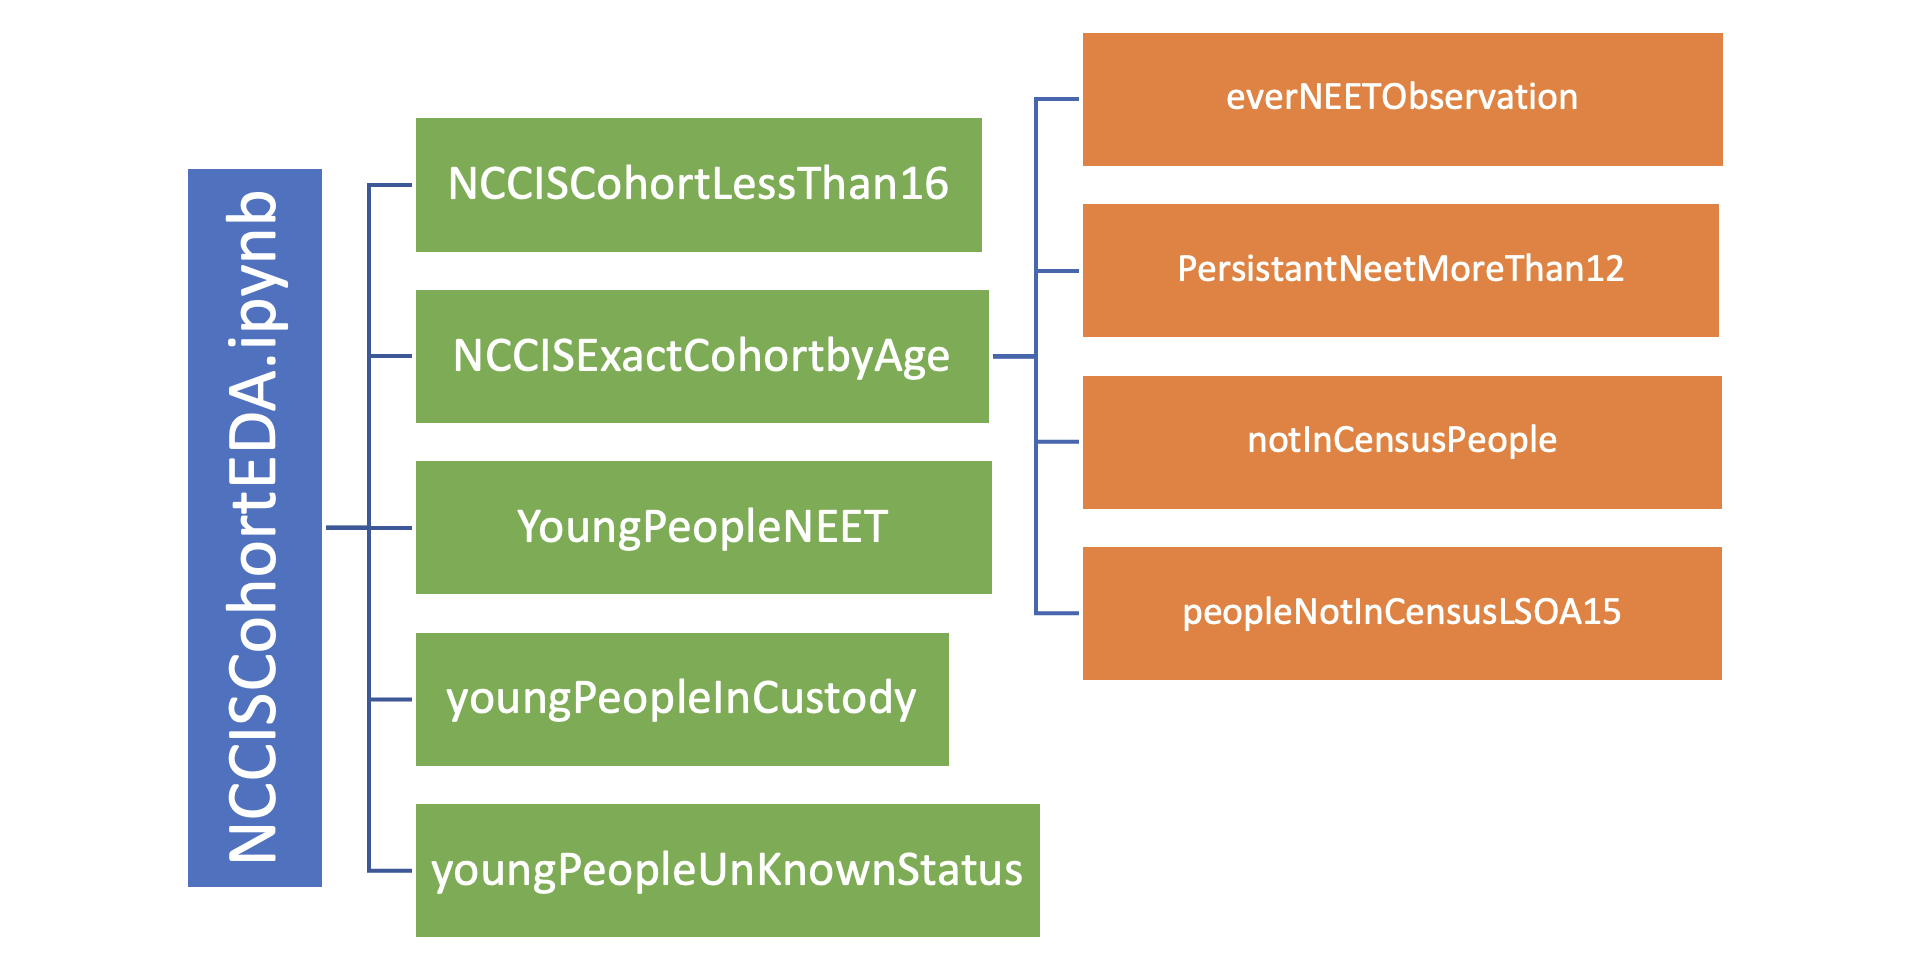

In [ ]:
# Import required libraries
from google.cloud import bigquery
import gc
from dateutil.relativedelta import relativedelta
import numpy as np
import math
import os
import pandas_gbq as pdg
import pandas as pd
import matplotlib.pyplot as plt
#import import_ipynb
#import NCCISCohortEDA as nccis
import kaleido
import plotly.graph_objects as go
import plotly
# Interactive Plotly map 
from matplotlib import style
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from shapely.geometry import Point, Polygon
import plotly.express as px
import warnings
style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

In [ ]:
#PLOT_OUTPUT_LOCATION = "reports/figures/"
def returnPlotLocation():
    PLOT_OUTPUT_LOCATION = "reports/figures/"
    return PLOT_OUTPUT_LOCATION

In [ ]:
def retINTERIM_DATA_LOCATION():
    INTERIM_DATA_LOCATION = "data/interim/"
    return INTERIM_DATA_LOCATION

In [ ]:
def NCCISExactCohortbyAge():
    return pd.read_csv(retINTERIM_DATA_LOCATION() + "EETNEETCohort16-18YAge.csv")

<div class="alert alert-block alert-warning">
    <H2># Records are retrieved and filtered and taken from NCCISCohortEDA.ipynb # </H2> <br>
    - Use appropriate functions to retrive dataframes of your interest and perform the necessary task.
</div>

In [ ]:
EETNEETExactCohortbyAge1618 = NCCISExactCohortbyAge()

<div class="alert alert-block alert-warning">
     <H3> #This file works on NEET COHORT Explicitly #</H3> 
    
-- You can retrive various dataframe as needed for researches  
    1. <b> notInCensusPeople() </b> returns people who do not have records in Census table. If you want to make any research on them you can use this function to retrun the values of person_id <br>
2. <b>PersistantNeetMoreThan12 </b> - People who have been persistently NEET for more than 12 months Duration use this Dataframe <br>
3. <b>everNEETObservation</b> - People have atleast 1 NEET Observation until 8 Observations use this Dataframe
</div>



# EDA Analysis through graphing details
1. To graph out no of Neet observations over the academic years

In [ ]:
EETNEETExactCohortbyAge1618

# Selecting NEET COHORT by  filtering records having even one NEET Observations for a person

In [ ]:
observationNeetMoreThan1=EETNEETExactCohortbyAge1618.query("total_neet_observations >= 1")
observationNeetMoreThan1

<div class="alert alert-block alert-info">
    <h3> # Persistent NEET threshold is No of NEET observations >= 12 # </h3> <br>
    - use the dataframe <b> PersistantNeetMoreThan12</b>
</div>

In [ ]:
PersistantNeetMoreThan12=EETNEETExactCohortbyAge1618.query("total_neet_observations >= 12")
PersistantNeetMoreThan12

PersistantNeetMoreThan12.to_csv(retINTERIM_DATA_LOCATION() + "PersistantNEET16_18YAge.csv", index=False)

In [ ]:
NoOfMonthsNEETPersonCNT = observationNeetMoreThan1.groupby(["No_of_months_neet"]).agg(
    { 'person_id':'count','total_observations':'max'})
NoOfMonthsNEETPersonCNT

<div class="alert alert-block alert-info">
<h3> # Ever NEET threshold is Total NEET Observation is more than 1 # </h3> <br>
    - use the dataframe <b>everNEETObservation</b>
</div>

In [ ]:
everNEETObservation=observationNeetMoreThan1

#everNEETObservation.to_csv(retINTERIM_DATA_LOCATION() + "EverNEET16_18YAge.csv", index=False)

<div class="alert alert-block alert-success">
<h2> # For what Activity codes the NEET Observations are high and how many people are being NEET under this category #</h2>
</div>

In [ ]:
observationNeetMoreThan1gp = observationNeetMoreThan1.groupby(["CurrentActivityCode"]).agg(
    {'total_neet_observations': 'max', 'No_of_months_neet': 'max', 'person_id':'nunique'})
observationNeetMoreThan1gp=observationNeetMoreThan1gp.reset_index()
observationNeetMoreThan1gp

<div class="alert alert-block alert-success">
<h2> # For each Academic Year find out the total NEET Observations, duration of months being NEET and how many people fall into this category of being NEET #</h2>
</div>

In [ ]:
# everNeetMoreThan2gp = everNEETObservation.groupby(["academic_start_date"]).agg(
#     {'total_neet_observations': 'max', 'No_of_months_neet': 'max', 'person_id':'nunique'})
# everNeetMoreThan2gp=everNeetMoreThan2gp.reset_index()
# everNeetMoreThan2gp

In [ ]:
ActivityCodes = [510,520,530,540,610,611,612,613,614,615,616,617, 618,619,620,630,640,650,660,670,680]
graphingData = observationNeetMoreThan1gp[observationNeetMoreThan1gp.CurrentActivityCode.isin(ActivityCodes)]
graphingData

In [ ]:
fig = plt.figure()
# Remove vertical space between axes
#fig.subplots_adjust(hspace=0)

plt.rcParams['text.color'] = 'Black'
plt.rcParams['font.size'] = 8

ax = graphingData.plot(kind='bar', x='CurrentActivityCode', y='person_id', label='Person Activity Code', color='pink')
ax.bar_label(ax.containers[0])
ax.set_xlabel('Activity Codes')
ax.set_ylabel('Count of people')
ax.legend(loc='upper left', fontsize= 10)

plt.savefig(returnPlotLocation() + "NEET16to18/ActivityCodesVsCount", dpi=300)

bx = graphingData.plot(kind='bar', x='CurrentActivityCode', y='No_of_months_neet', label='Neet months in that Activity Code', color='cyan')
bx.bar_label(bx.containers[0])
bx.set_xlabel('Activity Codes')
bx.set_ylabel('Duration spent as NEET in that Activity Code')
bx.legend(loc='upper left', fontsize= 10)

plt.savefig(returnPlotLocation() + "NEET16to18/ActivityCodesVsDuration", dpi=300)

<div class="alert alert-block alert-success">
<h2> # Analysis based on Ethinicity #</h2>
</div>

In [ ]:
NEETExactCohortbyAgeBarStacked = EETNEETExactCohortbyAge1618[['person_id','academic_start_date','ethinicity','total_neet_observations','custody_offender_observations','status_unknown_observations']].sort_values(by='person_id', ascending=True)



In [ ]:
NEETExactCohortbyAgeBarStacked['ethinicity'].unique()


In [ ]:
mapping = {
 'Asian or Asian British: Pakistani - England and Wales ethnic category 2011 census' : 'Asian', 
 'White: English or Welsh or Scottish or Northern Irish or British - England and Wales ethnic category 2011 census': 'English', 
 'Black or African or Caribbean or Black British: African - England and Wales ethnic category 2011 census': 'African', 
 'Asian or Asian British: any other Asian background - England and Wales ethnic category 2011 census': 'Asian', 
 'Asian or Asian British: Bangladeshi - England and Wales ethnic category 2011 census': 'Asian',
 'Asian or Asian British: Indian - England and Wales ethnic category 2011 census' : 'Asian I', 
 'Mixed multiple ethnic groups: White and Asian - England and Wales ethnic category 2011 census': 'MME', 
 'Mixed multiple ethnic groups: White and Black Caribbean - England and Wales ethnic category 2011 census': 'MME', 
 'Asian or Asian British: any other Asian background - England and Wales ethnic category 2011 census': 'Asian', 
 'Black or African or Caribbean or Black British: Caribbean - England and Wales ethnic category 2011 census':'African',
 'Mixed multiple ethnic groups: any other Mixed or multiple ethnic background - England and Wales ethnic category 2011 census':'MME',
 'Black or African or Caribbean or Black British: other Black or African or Caribbean background - England and Wales ethnic category 2011 census':'African',
 'Other ethnic group: Arab - England and Wales ethnic category 2011 census':'Other',
 'Asian or Asian British: Chinese - England and Wales ethnic category 2011 census':'Other',
 'Mixed multiple ethnic groups: White and Black African - England and Wales ethnic category 2011 census':'MME',
 'White: Irish - England and Wales ethnic category 2011 census':'Irish',
 'White: Gypsy or Irish Traveller - England and Wales ethnic category 2011 census':'Gypsy',
 "Unknown/Refuse to say', 'White:Any other White background":'unknown',
 'Other ethnic group: any other ethnic group - England and Wales ethnic category 2011 census':'Other',
 'White:Any other White background':'English'
}

NEETExactCohortbyAgeBarStacked['ethinicity'] = NEETExactCohortbyAgeBarStacked['ethinicity'].replace(mapping)
EETNEETExactCohortbyAge1618['ethinicity'] = EETNEETExactCohortbyAge1618['ethinicity'].replace(mapping)
NEETExactCohortbyAgeBarStacked['ethinicity'] = NEETExactCohortbyAgeBarStacked.ethinicity.str.replace(r"(^.*Unknown/Refuse to say.*$)", 'Unknown')
EETNEETExactCohortbyAge1618['ethinicity'] = EETNEETExactCohortbyAge1618.ethinicity.str.replace(r"(^.*Unknown/Refuse to say.*$)", 'Unknown')

#NEETExactCohortbyAgeBarStacked['ethinicity'].map(mapping)

NEETExactCohortbyAgeBarStacked


In [ ]:
NEETExactCohortbyAgeBarStackedgrp = NEETExactCohortbyAgeBarStacked.groupby(['ethinicity']).agg(
    {'total_neet_observations': 'max', 'custody_offender_observations': 'max', 'status_unknown_observations':'max'})
NEETExactCohortbyAgeBarStackedgrp = NEETExactCohortbyAgeBarStackedgrp.reset_index()
NEETExactCohortbyAgeBarStackedgrp


In [ ]:
CountGraphing = NEETExactCohortbyAgeBarStackedgrp[['total_neet_observations','custody_offender_observations']]
CountGraphing

In [ ]:
corrgraph = EETNEETExactCohortbyAge1618[['ethinicity','Learning_disability','EverNeetStatus']]
corrgraph

# Selecting only NEETCohort #

In [ ]:
NEETExactCohortbyAgeWithNEETStatus=EETNEETExactCohortbyAge1618.query("total_neet_observations >= 1")
NEETExactCohortbyAgeWithNEETStatus.sort_values("person_id")

<div class="alert alert-block alert-success">
<h2># Search in Census table for relevant data about these NEET people to understand their demograph #</h2><br>
1. Check for the LSOA if the last value is null take the available latest values for that person <br> 
2. Check if any FSMeligible, EverFSM6, EverFSM6P, EverFSMAll - Free School Meal <br>
3. InCareAtCurrentSchool Child in care <br>
4. Disability<br>
5. EYPPE, EYPPBF <br>
6. LSOA<br>
7. EYUEntitlement, EYEEntitlement, PPEntitlement, SBEntitlement Any Entitlements
</div>


In [ ]:
personUniqueID = NEETExactCohortbyAgeWithNEETStatus["person_id"].unique()
ct=len(personUniqueID)
ct


In [ ]:
#pID = map(str, personUniqueID) 
Pid = tuple(personUniqueID)

In [ ]:
sqlWideFormat = """ SELECT *
FROM `yhcr-prd-phm-bia-core.CB_FDM_DepartmentForEducation.src_census` 
WHERE person_id IN {} order by person_id, CensusDate""".format(Pid)

#sqlWideFormat

In [ ]:
tableDBWideFormat1 = pdg.read_gbq(sqlWideFormat, dialect='standard')



In [ ]:
#tableDBWideFormat1

In [ ]:
# column_names = list(tableDBWideFormat1.columns)
# column_names

In [ ]:
censusRecordsNEET = tableDBWideFormat1[["person_id","CensusDate","LSOA","AgeAtStartOfAcademicYear","FSMEligible","EverFSM6","EverFSM6P","EverFSMAll",
                                        "InCareAtCurrentSchool","Disability","EYPPE","EYPPBF","EYUEntitlement",
                                        "EYEEntitlement","PPEntitlement","SBEntitlement"]]

In [ ]:
#censusRecordsNEET

In [ ]:
censusRecordsNEET.AgeAtStartOfAcademicYear.unique()

In [ ]:
censusRecordsNEET.person_id.unique()

In [ ]:
x = censusRecordsNEET.query("AgeAtStartOfAcademicYear >=0 & AgeAtStartOfAcademicYear <= 21")
x.person_id.unique()

<div class="alert alert-block alert-success">

<h2># Findings :- # </h2> <br>
1. No of  NEET COHORT 14449 <br>
1. No of People with LSOA listed when they were 15 - 12688  (will loose data for 1761 people) <br>
2. No of People with LSOA listed when they were 15 or above  - 13267 <br>
    
<b> # Finding Those Cohort who are present as NEET but do not have even one record in Census table notInCensusPeople #</b>
</div>

In [ ]:
peopleInCensus=pd.DataFrame(censusRecordsNEET["person_id"].unique(), columns=['person_id']).sort_values('person_id')
peopleInNEETCohort=pd.DataFrame(personUniqueID,columns=['person_id'],).sort_values('person_id')
peopleInCensus.set_index('person_id', inplace=True)
peopleInNEETCohort.set_index('person_id', inplace=True)

notInCensusPeople=peopleInNEETCohort[~peopleInNEETCohort.index.isin(peopleInCensus.index)]
# #df2[df1 != df2].dropna(how='all', axis=1).dropna(how='all', axis=0)
# len(dftest2)
#dftest3.dropna(inplace=True)
notInCensusPeople

In [ ]:

notInCensusPeople.to_csv(retINTERIM_DATA_LOCATION() + "PeopleNotInCensus.csv", index=False)

In [ ]:
censusRecordsNEET["FreeSchoolMeal"] = censusRecordsNEET.groupby('person_id').EverFSM6.transform('any') | censusRecordsNEET.EverFSM6P | censusRecordsNEET.EverFSMAll

censusRecordsNEET["EntitlementFlag"] = censusRecordsNEET.groupby('person_id').EYUEntitlement.transform('any') | censusRecordsNEET.EYEEntitlement | censusRecordsNEET.PPEntitlement | censusRecordsNEET.SBEntitlement

censusRecordNEETDF = censusRecordsNEET[["person_id","CensusDate","AgeAtStartOfAcademicYear","LSOA","FSMEligible","InCareAtCurrentSchool","Disability","FreeSchoolMeal","EntitlementFlag"]]

censusRecordNEETDF

In [ ]:
#censusRecordNEETDF.query("person_id == 13764032")

In [ ]:
censusRecordsNEETLSOA15GP = censusRecordsNEET.query("AgeAtStartOfAcademicYear == 15").groupby(["person_id"]).agg({
        'LSOA':lambda x: x.dropna().tail(1),
        'FSMEligible': lambda x: x.dropna().tail(1), 
        'InCareAtCurrentSchool': lambda x: x.dropna().tail(1),
        'Disability': lambda x: x.dropna().tail(1),
        'FreeSchoolMeal': lambda x: x.dropna().tail(1), 
        'EntitlementFlag': lambda x: x.dropna().tail(1)
    })

censusRecordsNEETLSOA15GP=censusRecordsNEETLSOA15GP.reset_index()
censusRecordsNEETLSOA15GP

<div class="alert alert-block alert-success">
    # If you do not wish to limit the LSOA at 15 use the below block of code#
</div>

In [ ]:
peopleWithLSOA15 = censusRecordsNEETLSOA15GP[(censusRecordsNEETLSOA15GP["LSOA"]!='[]')]
peopleWithLSOA15

In [ ]:
peopleInCensusNEET=pd.DataFrame(censusRecordsNEETLSOA15GP["person_id"].unique(), columns=['person_id']).sort_values('person_id')
peopleInCohortLSOA15=pd.DataFrame(peopleWithLSOA15["person_id"].unique(), columns=['person_id']).sort_values('person_id')
peopleInCensusNEET.set_index('person_id', inplace=True)
peopleInCohortLSOA15.set_index('person_id', inplace=True)
peopleNotInCensusLSOA15=peopleInCensusNEET[~peopleInCensusNEET.index.isin(peopleInCohortLSOA15.index)]
peopleNotInCensusLSOA15


In [ ]:
peopleNotInCensusLSOA15.to_csv(retINTERIM_DATA_LOCATION() + "PeopleNotHavingLSOAat15.csv", index=False)

<div class="alert alert-block alert-success">
<b># There are close to 638 records than has missing LSOA when they were 15. Retrieve these people using peopleNotInCensusLSOA</b>
</div>


In [ ]:
peopleWithLSOA15.info()

LSOAUniq = peopleWithLSOA15['LSOA'].apply(lambda x: str(x))
peopleWithLSOA15['LSOA']= peopleWithLSOA15['LSOA'].apply(lambda x: str(x))

# For all the LSOA listed get its corresponding details from the lookup tbl_lsoa_boundaries

In [ ]:
LSOA_subset_codes = tuple(LSOAUniq)

In [ ]:
QUERY_BY_LSOA_SUBSET =  """ SELECT LSOA_code as LSOA, LSOA_name, geometry as geometry_home, 
lat_long FROM `yhcr-prd-phm-bia-core.CB_LOOKUPS.tbl_lsoa_boundaries` WHERE LSOA_code IN {}""".format(LSOA_subset_codes[1:-1])

In [ ]:
#QUERY_BY_LSOA_SUBSET

In [ ]:
tableLSOA = pdg.read_gbq(QUERY_BY_LSOA_SUBSET, dialect='standard')

In [ ]:
#tableLSOA

In [ ]:
#censusRecordNEETwithLSOA = pd.merge(censusRecordsNEETGP,tableLSOA,on='LSOA',how='left')
censusRecordNEETwithLSOA = pd.merge(peopleWithLSOA15,tableLSOA,on='LSOA',how='left')
#censusRecordNEETwithLSOA

In [ ]:
NEETStatusCohortBFMerge = NEETExactCohortbyAgeWithNEETStatus[["person_id","CurrentActivityCode","year_month_birth","Age","gender","ethinicity","academic_start_date","total_neet_observations","custody_offender_observations","status_unknown_observations"]].sort_values("person_id")


In [ ]:
NEETStatusCohortAfterMerge = pd.merge(NEETStatusCohortBFMerge,censusRecordNEETwithLSOA,on='person_id',how='left')
#NEETStatusCohortAfterMerge.query("CurrentActivityCode != 619")
NEETStatusCohortAfterMerge

In [ ]:
dfBG = NEETStatusCohortAfterMerge.astype(str)
dfBG.to_gbq('yhcr-prd-phm-bia-core.CB_MYSPACE_RT.EverNEETLSOA', 
                 chunksize=None, # I have tried with several chunk sizes, it runs faster when it's one big chunk 
                 if_exists='replace'
                 )

In [ ]:
dfBG.to_csv(retINTERIM_DATA_LOCATION() + "EverNEETLSOA.csv", index=False)

In [ ]:
# Geospatial analysis
import geopandas as gpd
#import cartopy as ccrs
import contextily as cx

# Visualisation
from matplotlib import font_manager
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
from shapely.geometry import Point
import seaborn as sns

import kaleido
import plotly.express as px
import plotly.io as pio

In [ ]:
# # Plotting config
# pio.orca.config.executable = '/path/to/orca'
# pio.orca.config.save()

# # Define palettes
# pal_full = ["#71297d","#ff9505","#4281a4","#057652","#0e0004"]
# pal_gender = dict(F="#71297D" , M="#FF9505")
# pal_school = dict(Primary="#71297D" , Secondary="#FF9505")
# pal_auth_unauth = dict(Authorised="#71297D" , Unauthorised="#FF9505")

# # Print palette
# sns.palplot(sns.color_palette(pal_full))

# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=pal_full)

# # Set Seaborn defaults
# sns.set(
#         rc={
#  'axes.axisbelow': False,
#  'axes.edgecolor': 'lightgrey',
#  'axes.facecolor': 'None',
#  'axes.grid': True,
#  'grid.color': 'lightgrey',
#  'axes.axisbelow': True,
#  'axes.labelcolor': 'black',
#  'axes.spines.right': False,
#  'axes.spines.top': False,
#  'figure.facecolor': 'white',
#  'lines.solid_capstyle': 'round',
#  'patch.edgecolor': 'w',
#  'patch.force_edgecolor': True,
#  'text.color': 'black',
#  'xtick.bottom': False,
#  'xtick.color': 'black',
#  'xtick.direction': 'out',
#  'xtick.top': False,
#  'ytick.color': 'black',
#  'ytick.direction': 'out',
#  'ytick.left': False,
#  'ytick.right': False,
# }
# )

# sns.set_context("notebook", rc={"font.size":18,
#                                 "axes.titlesize":22,
#                                 "axes.labelsize":20})

In [ ]:
# Matplotlib/Seaborn custom font check
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")
font_manager.findfont("Plus Jakarta Sans") # Test with "Special Elite" too

<div class="alert alert-block alert-success">
<h2> # Filtering records pertaining to Bradford only ans Age of the student when they were 16 - 18 with LSOA at 15 #</h2>
</div>



In [ ]:
DFE16Brasford = NEETStatusCohortAfterMerge.query('LSOA_name.str.contains("Bradford") == True')
DFE16Brasford

In [ ]:
#DFE16Brasford["CountofPeople"] = DFE16Brasford.groupby(['academic_start_date','LSOA'])['person_id'].transform('count')
#DFE16Brasford

In [ ]:
DFE16Brasford = DFE16Brasford.groupby(['academic_start_date','LSOA'], as_index=False).agg({
        'LSOA_name':'max',
        'geometry_home':'max',
        'Age':'max',
        #'total_neet_observations': 'sum',
        #'custody_offender_observations': 'sum',
        #'status_unknown_observations': 'sum',
        'person_id':'count'})                                   
DFE16Brasford['CountofPeople']=DFE16Brasford['person_id']
DFE16Brasford

In [ ]:
DFE16Brasford.query("Age==16").sort_values("CountofPeople",ascending=False)

In [ ]:
#for key in DataFrameDict.keys():
    
fig, ax = plt.subplots(figsize=(16,9))

plt.rcParams['font.size'] = 6
    # Create swarm plot
sns.swarmplot(
    #data=DataFrameDict[key], 
    data=DFE16Brasford,
    x='academic_start_date', 
    y='CountofPeople', 
    hue=None, 
    alpha=.75,
    color='purple',
    size=6.6,
    dodge=True
)

    # Chart formatting

for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)

ax.set_title("Count of people being NEET vs Academic Year", fontsize=24)
ax.set_ylabel("No of NEET Observations", fontsize=16)
ax.set_xlabel('', fontsize=22)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
#ax.yaxis.set_major_formatter('{x:.0}')

sns.despine(left=True)
#plt.savefig(returnPlotLocation() + "NEET16to18/LSOA_Neet_Count_swarmplot_" + str(key), dpi=300)

plt.savefig(returnPlotLocation() + "NEET16to18/LSOA_Neet_Count_swarmplot", dpi=300)


In [ ]:
# # Geometry cretion
# # Assign the geometry column as the active geometry

DFE16Brasford['geometry'] = gpd.GeoSeries.from_wkt(DFE16Brasford['geometry_home'], crs=4258)
gdf_NEET_by_lsoa = gpd.GeoDataFrame(DFE16Brasford, geometry='geometry')
gdf_NEET_by_lsoa = gdf_NEET_by_lsoa.set_index('LSOA_name')
gdf_NEET_by_lsoa


In [ ]:
def drawMapbox17(xDF, intAge, animationFrame, Ttitle):
    # Draw the map for each LSOA in the dataframe
    fig = px.choropleth_mapbox(xDF,
                            geojson=xDF.geometry,
                            locations=xDF.index,
                            hover_data=['CountofPeople','LSOA'],
                            color="CountofPeople",
                            mapbox_style="carto-positron",
                            opacity=0.6,
                            color_continuous_scale="blackbody_r",
                            zoom=10.35,
                            center = {"lat": 53.7999, "lon": -1.7564},
                            width=800,
                            height=900,
                            #animation_frame = animationFrame,

    )

    fig.update_geos(fitbounds="locations", visible=False)

    fig.update_traces(
        marker_line_width=0.7,
        marker_line_color="grey",
    )


    fig.update_layout(
        coloraxis_colorbar_title_text = 'Count of People',
        coloraxis_colorbar_tickformat="", 
        title = "No of People NEET vs "+Ttitle+ " when they were "+str(intAge)
    )

    fig.write_html(returnPlotLocation() + "NEET16to18/maps/NEET"+str(intAge)+"LSOA.html")
    fig.write_image(returnPlotLocation() + "NEET16to18/maps/NEET"+str(intAge)+"LSOA_plotly_map.svg")

    fig.show()

In [ ]:
drawMapbox17(gdf_NEET_by_lsoa,17,"LSOA", "LSOA")

In [ ]:
# %system free -m
# drawMapbox(gdf_NEET_by_lsoa16,16,"academic_start_date", "Academic Year")

In [ ]:
#gdf_NEET_by_lsoa


In [ ]:
#!conda install -c conda-forge cartopy

In [ ]:
#!apt-get install libgeos++ libproj-dev
#!pip install geoviews

In [ ]:
import xarray as xr
import hvplot.pandas  # noqa
import hvplot.xarray  # noqa
#import cartopy.crs as ccrs
#import spatialpandas as spd

#spd_world = spd.GeoDataFrame(gdf_NEET_by_lsoa)

#spd_world.hvplot(datashade=True, project=True, aggregator='CountofPeople', c='LSOA', color_key='Category10')

# gdf_NEET_by_lsoa.hvplot(geo=True) + gdf_NEET_by_lsoa.hvplot(c='LSOA', geo=True)

In [ ]:
NEETStatusCohortAfterMerge["LSOACount"] = NEETStatusCohortAfterMerge["LSOA"]

In [ ]:
simpsonDiversityIndexCalc = NEETStatusCohortAfterMerge.groupby(["LSOA"], as_index=False).agg({
        'LSOACount': 'count'})
# sDict = simpsonDiversityIndexCalc.to_dict(orient="records")
# sDict
#SDict = simpsonDiversityIndexCalc.to_dict('split')
#print(SDict['data'])

studentDict = simpsonDiversityIndexCalc.set_index('LSOA').to_dict()['LSOACount']



In [ ]:
def simpsons_diversity_index(data):

    """ Given a hash { 'species': count } , returns the Simpson Diversity Index
    
    >>> simpson_di({'a': 10, 'b': 20, 'c': 30,})
    0.3888888888888889
    """

    def p(n, N):
        """ Relative abundance """
        if n is  0:
            return 0
        else:
            return float(n)/N

    N = sum(data.values())
    
    return sum(p(n, N)**2 for n in data.values() if n is not 0)


def inverse_simpson_di(data):
    """ Given a hash { 'species': count } , returns the inverse Simpson Diversity Index
    
    >>> inverse_simpson_di({'a': 10, 'b': 20, 'c': 30,})
    2.571428571428571
    """
    return float(1)/simpsons_diversity_index(data)


diversity_index = simpsons_diversity_index(studentDict)
print(f"Simpson's Diversity Index: {diversity_index}")


# # Calculate Simpson's Diversity Index
# diversity_index = simpson()

# print(f"Simpson's Diversity Index: {diversity_index}")

<div class="alert alert-block alert-success">
<b> # Use these functions below to access the Dataframe of interest </b><br>
1. everNEETObservation<br>
2. PersistantNeetMoreThan12<br>
3. notInCensusPeople<br>
4. peopleNotInCensusLSOA15<br>
</div>

In [ ]:
# def everNEETObservation():
#     return pd.read_csv(retINTERIM_DATA_LOCATION() + "EverNEET16_18YAge.csv")

In [ ]:
# def PersistantNeetMoreThan12():
#     return pd.read_csv(retINTERIM_DATA_LOCATION() + "PersistantNEET16_18YAge.csv")

In [ ]:
# def notInCensusPeople():
#     return pd.read_csv(retINTERIM_DATA_LOCATION() + "PeopleNotInCensus.csv")

In [ ]:
# def peopleNotInCensusLSOA15():
#     return pd.read_csv(retINTERIM_DATA_LOCATION() + "PeopleNotHavingLSOAat15.csv")

In [ ]:
# NEETStatusCohortAfterMerge["CountofPeople"] = NEETStatusCohortAfterMerge["person_id"] 

# To calculate the concentration

In [ ]:
NEETStatusCohortLSOAByConc = (NEETStatusCohortAfterMerge.groupby(["person_id", "LSOA", "geometry_home"], as_index=False)
    .agg({
        'total_neet_observations': 'sum',
        'custody_offender_observations': 'sum',
        'status_unknown_observations': 'sum',
        'CountofPeople': 'count'}).assign(NEETObservationRatio = lambda df: df["total_neet_observations"] / df["CountofPeople"],
                                         CustodyOffenderRatio = lambda df: df["custody_offender_observations"] / df["CountofPeople"],
                                         StatusUnknownRatio = lambda df: df["status_unknown_observations"] / df["CountofPeople"]))

NEETStatusCohortLSOAByConc

In [ ]:
PARETO_THRESHOLD = 0.8
def pareto_n(data: pd.DataFrame, pareto_threshold: float, pareto_col: str): 
    """"
    Pareto Concentration calculation function:
    
    Parameters:
        data: input dataframe
        pareto_threshold: the threshold to calculate the pareto proportion for
        pareto_col: column in the input dataframe to be analysed
        
    Steps:
        Sort values by NEET count
        Caluclate cumulative sum
        Calculate cumulative sum fraction of total
        Determine number of people that meet pareto threshold
        Determine fraction of people to meet pareto threshold
    """
    
    tot_n = len(data)

    pareto_subset = (
        data
        .sort_values(by=pareto_col, ascending=False)
        .assign(
            total = lambda df: df[pareto_col].sum(),
            cum_sum = lambda df: df[pareto_col].cumsum(),
        )
    )
    
    pareto_subset = (
        pareto_subset
        .sort_values(by=pareto_col, ascending=False)
        .assign(cum_sum_frac = lambda df: df["cum_sum"] / df["total"])
        .query(f"cum_sum_frac <= {pareto_threshold}")
    )

    pareto_n = len(pareto_subset)
    concentration = float(pareto_n) / tot_n

    #print(f"total_n = {tot_n} \n pareto_n = {pareto_n} \n concentration = {concentration}")

    return concentration, pareto_n

In [ ]:
# Apply custom function to calculate concentration 
NEETStatusCohortLSOAByConcPareto = (NEETStatusCohortLSOAByConc
    .groupby(["LSOA"], as_index=False)
    .apply(lambda x: pareto_n(data=x, pareto_threshold=PARETO_THRESHOLD, pareto_col="CountofPeople")[0])
    .rename(columns={None: "Concentration"})
)

In [ ]:
NEETStatusCohortLSOAByConcPareto["Concentration"].describe()

In [ ]:
min_conc_80_lsoa = NEETStatusCohortLSOAByConcPareto.sort_values(by="Concentration", ascending=False).head(1)
max_conc_80_lsoa = NEETStatusCohortLSOAByConcPareto.sort_values(by="Concentration", ascending=False).tail(1)
print(f"Min LSOA: {min_conc_80_lsoa}")
print(f"Max LSOA: {max_conc_80_lsoa}")
NEETStatusCohortLSOAByConcPareto

In [ ]:
# fig, ax = plt.subplots(figsize=(16,5))

# sns.boxplot(
#     data=NEETStatusCohortLSOAByConcPareto, 
#     x='Concentration', 
#     whis=[0, 100], 
#     width=.6,
#     color='#edebed',
# )

# for i,box in enumerate(ax.artists):
#     box.set_edgecolor('black')
#     box.set_facecolor('white')

# sns.swarmplot(
#     data=NEETStatusCohortLSOAByConcPareto, 
#     x='Concentration', 
#     hue=None, 
#     alpha=0.8,
#     size=10,
#     color=pal_full[0]
# )

# ax.set_title(f"NEET Count Concentration ({PARETO_THRESHOLD:.0%}) by LSOA", fontsize=24)
# ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
# ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=1))
# ax.set_xlabel("NEET Count Concentration (80%)", fontsize=22)
# ax.set_xlim(0,100)

# plt.savefig(returnPlotLocation() + "NEET16to18/concentration_NEET_by_lsoa_swarmplot.png", dpi=200, bbox_inches='tight')
# fig.show()

In [ ]:
# # Group previous data by LSOA
# # Calculate absence rates as absent sessions / possible sessions 
# # Sort by academic year
# NEETStatusCohortLSOAByYearagg = (NEETStatusCohortAfterMerge.groupby(['academic_start_date','LSOA','LSOA_name','geometry_home'], as_index=False)
#     .agg({
#         'LSOA':'count',
#         'total_neet_observations': 'sum',
#         'custody_offender_observations': 'sum',
#         'status_unknown_observations': 'sum',
#         'CountofPeople': 'count'}).assign(NEETObservationRatio = lambda df: df["total_neet_observations"] / df["CountofPeople"],
#                                          CustodyOffenderRatio = lambda df: df["custody_offender_observations"] / df["CountofPeople"],
#                                          StatusUnknownRatio = lambda df: df["status_unknown_observations"] / df["CountofPeople"])).sort_values(by="academic_start_date")

In [ ]:
# #create unique list of names
# UniqueAcademicYear = NEETStatusCohortLSOAByYearagg.academic_start_date.unique()
# UniqueAcademicYears

In [ ]:

# #create a data frame dictionary to store your data frames
# DataFrameDict = {elem : pd.DataFrame() for elem in UniqueAcademicYear}

In [ ]:
# for key in DataFrameDict.keys():
#     DataFrameDict[key] = NEETStatusCohortLSOAByYearagg[:][NEETStatusCohortLSOAByYearagg.academic_start_date == key]

# # for key in DataFrameDict.keys():
# #     print(key)
# #     print(DataFrameDict[key].LSOA_name)